# Guia

1. Introducción: ¿Qué es una máquina de soporte vectorial y cómo se usa para clasificar? Aquí deberían ir también las formas de implementación y el uso de las librerías. 

2. El problema: Contextualización del problema que se quiere estudiar, presentar el problema como la creación del hiperplano

3. Implementación y resultados

4. Conclusiones

In [ ]:
#Modelo
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

#Estos cuatro son nuevos y muy importantes para los resultados
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Visualizaciones
import seaborn as sns

#Acceso a los datos
from google.colab import drive
drive.mount('/content/drive')

Links:

*  [Latex](https://es.overleaf.com/project/60d3a1695d85cb82eebc6702)
*  [Base de Datos Adultos](https://archive.ics.uci.edu/ml/datasets/Adult)
*  [Sckit Learn SVM](https://scikit-learn.org/stable/modules/svm.html)
*  [SVM con Python](https://www.cienciadedatos.net/documentos/py24-svm-python.html) 
*  [In-Depth: SVM](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
*  **Sección 8.6 Libro Guia**
*  [Parametros SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
*  [Ideas (Ejemplo Juguete)](https://unipython.com/svc-lineal-machine-learning/)
*  [Guias Matplolib](https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#graficos-3d)
*  [Explicación Hiperbasica](https://www.iartificial.net/maquinas-de-vectores-de-soporte-svm/#:~:text=El%20truco%20del%20kernel%20en%20SVM,-Hay%20veces%20en&text=El%20truco%20del%20kernel%20consiste,con%20una%20superficie%20de%20decisi%C3%B3n.)
*  [Analisis de algoritmos de Aprendizaje](https://eprints.ucm.es/id/eprint/48800/1/Memoria%20TFM%20Machine%20Learning_Juan_Zamorano_para_difundir%20(2).pdf) 
*  [Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)
*  [Parametros SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## Herramientas de tratamiento de datos con Pandas

In [ ]:
#Data Frame Completo, no traia la primera fila de descripcion por columnas se la agregue yo a mano

DataF = pd.read_csv("drive/MyDrive/SVM/Adultos Data Set/adult.csv") #(,Index_col="id")  Para cambiar los idices por la columna id

DataF  #Muestra el Data Frame

#DataF.head(60) #Primeras 5 lineas del DF, Cantidad modificable
#DataF.tail() #Ultimas 5 lineas del DF, Cantidad modificable

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Limpieza de datos

#DataF.dropna() #Elimina Filas con NaN
#DataF.fillna(0) #Cambia NaN por variable, podeos hacerlo por columnas con  ({"Name1": 0,"Name2":-1})

In [ ]:
#Filtrado de datos

#DataF["Native-Contry"] #Filtrar por Columnas mediante nombre
#DataF[["Sex","Race","Capital"]] #Formato para varias columnas

#DataF.iloc[0:12] #Filtrado por filas [0] para unicas, [0:11] Rango,[[1,3,5,7]] Multiples (.loc filtra por identificadores, que en esta base de datos no se tienen)

#DataF.loc[[1,5],["Sex","Race","Capital"]] #Filtrado Mixto

#Filtrado por condiciones

#DataF[DataF["Education-num"] >8]
#DataF[(DataF["Education-num"] >8)&(DataF["Hours-per-Week"] == 40)] # And &, Or |

#DataF[DataF["Native-Country"].str.contains("Cuba")]

In [ ]:
#Funciones

#Una variable (Por columnas)
def CapitalIndicator(Capital):
  if ("<" in Capital):
    return (-1)
  if (">" in Capital):
    return (1)

#Podemos definir funciones y crear nuevas columnas con datos generados a partir de los datos ya existentes
DataF["Capital-Indicator"] = DataF["Capital"].apply(CapitalIndicator) #Se trasforman la información en capital en un indicador numerico

#Varias variebles (Por Filas)
def ToyFunction(fila):
  return (fila["Hours-per-Week"]*(fila["Age"]-17))

DataF["ToyCol"] = DataF.apply(ToyFunction, axis=1)

DataF

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Capital,Capital-Indicator,ToyCol
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-1,880
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-1,429
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,-1,840
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,-1,1440
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,-1,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,-1,380
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,920
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-1,1640
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,-1,100


In [ ]:
DataF.groupby("Race").agg({
           "Education-num": "mean",
          "Hours-per-Week": "max",})

,Education-num,Hours-per-Week
Race,,
Amer-Indian-Eskimo,9.311897,84
Asian-Pac-Islander,10.960539,99
Black,9.486236,99
Other,8.841328,98
White,10.135246,99


In [ ]:
#Guardar Data Frame

#Name.to_csv("FileName")

#### Descripcion de las variables

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: continuous.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


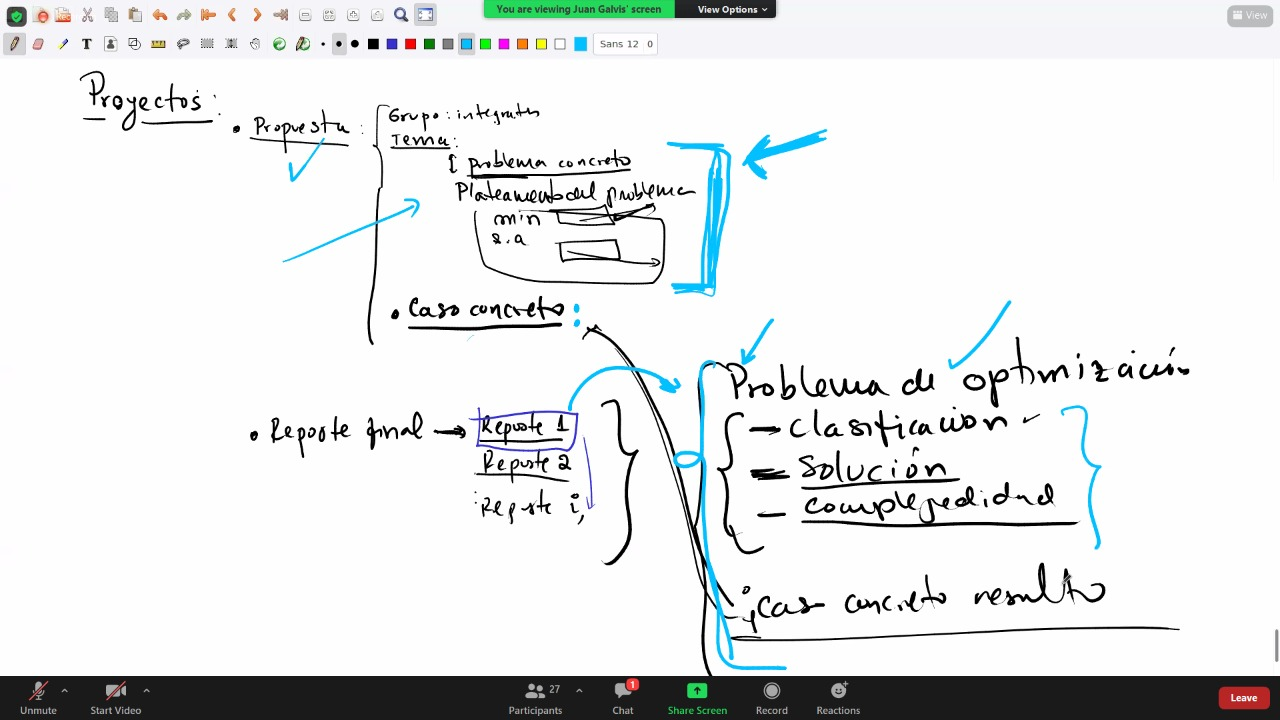

# Signo de un Producto (Aplicacion de Juguete)

In [ ]:
#Seudo base de datos que asocia un producto con su Signo, siendo -1 (Negativo) y 1 (Positivo) los posibles valores.
X=[[1,1],[1,-1],[-1,1],[-1,-1],[10,10],[10,-10],[-10,10],[-10,-10],[100,100],[100,-100],[-100,100],[-100,-100],[1000,1000],[1000,-1000],[-1000,1000],[-1000,-1000],[10000,10000],[10000,-10000],[-10000,10000],[-10000,-10000]]
y=[1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1]

#Entrenamiento  de una SVM de clasificacion con los valores estandar de la libreria Sklearn
clf = svm.SVC()
clf.fit(X, y)

"""
El Kernel separa los datos "agregando" una dimension a estos, sobre el cual si es posible encontrar un plano soporte que separe los datos, en general ese aumento de dimesion se ahorra
usando el Kernel de la funcion que se usa para hacer este "aumento de dimension", por dfault se usara el kernel de la funcion de base radial (RBF) [exp()], que funciona teoricamente en compactos
y en la practica en (virtualmente) todos los casos
"""


#IMPORTANTE LEER SOBRE LAS VARIABLES DE LA FUNCION SVC

'\nEl Kernel separa los datos "agregando" una dimension a estos, sobre el cual si es posible encontrar un plano soporte que separe los datos, en general ese aumento de dimesion se ahorra\nusando el Kernel de la funcion que se usa para hacer este "aumento de dimension", por dfault se usara el kernel de la funcion de base radial (RBF) [exp()], que funciona teoricamente en compactos\ny en la practica en (virtualmente) todos los casos\n'

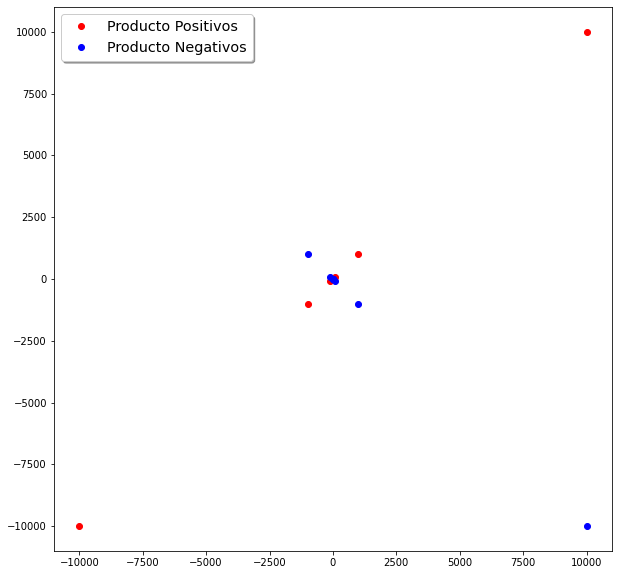

In [ ]:
#Graficar los datos separando por color negativos y positivos
p1= []
p2= []
x1= []
x2= []

np.append(p1,X[0][0])

for i in range(len(X)):
  if y[i] ==1:
    p1.append(X[i][0])
    x1.append(X[i][1])
  else:
    p2.append(X[i][0])
    x2.append(X[i][1])


plt.figure(figsize=(10, 10))
plt.plot(x1, p1, 'ro',label='Producto Positivos')
plt.plot( x2, p2, 'bo',label='Producto Negativos')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

#En este cado la SVC tuvo que usar Kernel, por la distribucion de los datos
#Quiero hacer otro ejemplo en el que no tenga que usar Kernel (Aun mas de Juguete)

In [ ]:
#En este caso por la forma de los datos solo funciona bien para valores |x|<100001

clf.predict([[862, -567]])

array([-1])

# Segmentacion Salarial

## Base de Datos Depurada




###Funciones para el Procesamiento:

In [ ]:
# WorkClass (Descriptiva)-->Tipo de Trabajo (Indicador Numerico)
def ClassToType (Workclass):
  #Workclass = str (WC)
  if ("Private" in Workclass):
    return (1)
  if ("Self-emp-not-inc" in Workclass):
    return (2)
  if ("Self-emp-inc" in Workclass):
    return (3)
  if ("Federal-gov" in Workclass):
    return (4)
  if ("Local-gov" in Workclass):
    return (5)
  if ("State-gov" in Workclass):
    return (6)
  if ("Without-pay" in Workclass):
    return (7)
  if ("Never-worked" in Workclass):
    return (8)
  else:
    return (0)

In [ ]:
# Marital-status (Descriptiva)-->Estado Civil (Indicador Numerico)
def StatusToType (X):
  #Workclass = str (WC)
  if ("Married-civ-spouse" in X):
    return (1)
  if ("Divorced" in X):
    return (2)
  if ("Never-married" in X):
    return (3)
  if ("Separated" in X):
    return (4)
  if ("Widowed" in X):
    return (5)
  if ("Married-spouse-absent" in X):
    return (6)
  if ("Married-AF-spouse" in X):
    return (7)
  else:
    return (0)

In [ ]:
# occupation (Descriptiva)-->Ocupación (Indicador Numerico)
def OcupToType(X):
  #Workclass = str (WC)
  if ("Tech-support" in X):
    return (1)
  if ("Craft-repair" in X):
    return (2)
  if ("Other-service" in X):
    return (3)
  if ("Sales" in X):
    return (4)
  if ("Exec-managerial" in X):
    return (5)
  if ("Prof-specialty" in X):
    return (6)
  if ("Handlers-cleaners" in X):
    return (7)
  if ("Machine-op-inspct" in X):
    return (8)
  if ("Adm-clerical" in X):
    return (9)
  if ("Farming-fishing" in X):
    return (10)
  if ("Transport-moving" in X):
    return (11)
  if ("Priv-house-serv" in X):
    return (12)
  if ("Protective-serv" in X):
    return (13)
  if ("Armed-Forces" in X):
    return (14)
  else:
    return (0)


In [ ]:
# relationship (Descriptiva)-->Tipo de Pareja (Indicador Numerico)
def RelationToType (X):
  #Workclass = str (WC)
  if ("Wife" in X):
    return (1)
  if ("Own-child" in X):
    return (2)
  if ("Husband" in X):
    return (3)
  if ("Not-in-family" in X):
    return (4)
  if ("Other-relative" in X):
    return (5)
  if ("Unmarried" in X):
    return (6)
  else:
    return (0)

In [ ]:
# Race(Descriptiva)-->Raza (Indicador Numerico)
def RaceToType (X):
  #Workclass = str (WC)
  if ("White" in X):
    return (1)
  if ("Asian-Pac-Islander" in X):
    return (2)
  if ("Amer-Indian-Eskimo" in X):
    return (3)
  if ("Black" in X):
    return (4)
  if ("Other" in X):
    return (5)
  else:
    return (0)

In [ ]:
# Sex (Descriptiva)-->Genero Binario (Indicador Numerico)
def SexToType (X):
  #Workclass = str (WC)
  if ("Female" in X):
    return (1)
  if ("Male" in X):
    return (2)
  else:
    return (0)

## Support Vector Machines (Con sesgo)

### Base de Datos Transformada con sesgo

In [ ]:
#Inicializar la base de datos original
DataF = pd.read_csv("drive/MyDrive/SVM/Adultos Data Set/adult.csv")

def CapitalIndicator(Capital):
  if ("<" in Capital):
    return (-1)
  if (">" in Capital):
    return (1)

#Podemos definir funciones y crear nuevas columnas con datos generados a partir de los datos ya existentes
DataF["Capital"] = DataF["Capital"].apply(CapitalIndicator)
DataF

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,-1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,-1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,-1


In [ ]:
DataB = pd.DataFrame()

DataB["Edad"] = DataF["Age"]
DataB["T. Trabajo"] = DataF["Workclass"].apply(ClassToType) 
DataB["Nivel Educativo"] = DataF["Education-num"]
DataB["E. Civil"] = DataF["Marital-Status"].apply(StatusToType) 
DataB["Ocupación"] = DataF["Occupation"].apply(OcupToType)
DataB["T. Pareja"] = DataF["Relationship"].apply(RelationToType)
DataB["Raza"] = DataF["Race"].apply(RaceToType)
DataB["Genero B."] = DataF["Sex"].apply(SexToType)
DataB["H.Laborales"] = DataF["Hours-per-Week"]

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales
0,39,6,13,3,9,4,1,2,40
1,50,2,13,1,5,3,1,2,13
2,38,1,9,2,7,4,1,2,40
3,53,1,7,1,7,3,4,2,40
4,28,1,13,1,6,1,4,1,40
...,...,...,...,...,...,...,...,...,...
32556,27,1,12,1,1,1,1,1,38
32557,40,1,9,1,8,3,1,2,40
32558,58,1,9,5,9,6,1,1,40
32559,22,1,9,3,9,2,1,2,20


#### Descripcion:

* Edad: Entero. 

* Tipo de Trabajo: 
 1. Empresa Privada
 2. Autonomo sin empresa
 3. Autonomo con empresa
 4. Para el gobierno Federal 
 5. Para el gobierno Local
 6. Para el gobierno Estatal
 7. Sin Paga (Desempleado supongo)
 8. Nunca a Trabajado 

* Indicador de nivel Academico: 
 1. Prescolar
 2. 1st-4th 
 3. 5th-6th
 4. 7th-8th
 5. 9th
 6. 10th
 7. 11th
 8. 12th
 9. Grado Escolar
 10. Alguna educacion superior
 11. Assoc-voc (NPI)
 12. Assoc-acdm (NPI)
 13. Grado Superior
 14. Maestria
 15. Profesor
 16. Doctorado
 
  

* Estado Civil: 
 1. Matrimonio Civil
 2. Divorciado/a
 3. Nunca se a casado/a 
 4. Separado/a 
 5. Viudo/a  
 6. Casado con pareja ausente
 7. Married-AF-spouse (NPI)

* occupation: 1.Tech-support, 2.Craft-repair, 3.Other-service, 4.Sales, 5.Exec-managerial, 6.Prof-specialty, 7.Handlers-cleaners, 8.Machine-op-inspct, 9.Adm-clerical, 10.Farming-fishing, 11.Transport-moving, 12.Priv-house-serv, 13.Protective-serv, 14.Armed-Forces. x

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. x

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Black, Other. x

* sex: Female, Male.

* hours-per-week: continuous.



(DataB no incluye  Pais de origen aun)

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### SVM sin Pais de origen

In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

#De todas maneras hice la prueba con otras proporciones pero no mejoraron el resultado

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)


#?????????????????????????????????????????????????????????????????????????????????????????????????????
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.8301770907974204


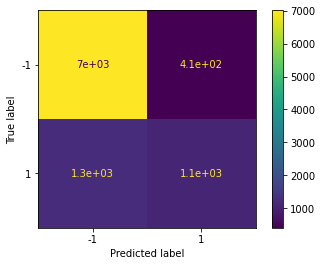

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_1 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_1)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.8223973794656567


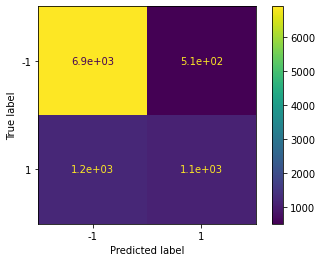

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.8248541304125294


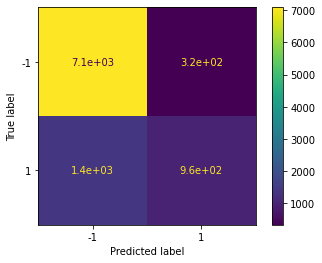

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7468522878493192


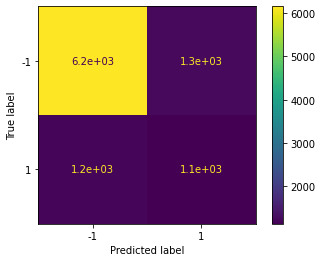

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM Completo


#### Funcion de Pais de Origen (Indicador Numerico)

In [ ]:
#Native-Country (Descriptivo) --> Pais de Origen (Indicador Numerico)
def NatToType (X):
  if ("United-States" in X):
    return (1)
  if ("Cambodia" in X):
    return (2)
  if ("England" in X):
    return (3)
  if ("Puerto-Rico" in X):
    return (4)
  if ("Canada" in X):
    return (5)
  if ("Germany" in X):
    return (6)
  if ("Outlying-US" in X):
    return (7)
  if ("India" in X):
    return (8)
  if ("Japan" in X):
    return (9)
  if ("Greece" in X):
    return (10)
  if ("South" in X):
    return (11)
  if ("China" in X):
    return (12)
  if ("Cuba" in X):
    return (13)
  if ("Iran" in X):
    return (14)  
  if ("Honduras" in X):
    return (15)
  if ("Philippines" in X):
    return (16)
  if ("Italy" in X):
    return (17)
  if ("Poland" in X):
    return (18)
  if ("Jamaica" in X):
    return (19)
  if ("Vietnam" in X):
    return (20)
  if ("Mexico" in X):
    return (21)
  if ("Portugal" in X):
    return (22)
  if ("Ireland" in X):
    return (23)
  if ("France" in X):
    return (24)
  if ("Dominican-Republic" in X):
    return (25)
  if ("Laos" in X):
    return (26)
  if ("Ecuador" in X):
    return (27)
  if ("Taiwan" in X):
    return (28)
  if ("Haiti" in X):
    return (29)
  if ("Columbia" in X):
    return (30)
  if ("Hungary" in X):
    return (31)
  if ("Guatemala" in X):
    return (32)
  if ("Nicaragua" in X):
    return (33)
  if ("Scotland" in X):
    return (34)
  if ("Thailand" in X):
    return (35)
  if ("Yugoslavia" in X):
    return (36)
  if ("El-Salvador" in X):
    return (37)
  if ("Trinadad&Tobago" in X):
    return (38)
  if ("Peru" in X):
    return (39)
  if ("Hong" in X):
    return (40)
  if ("Holand-Netherlands" in X):
    return (41)
  else:
    return (0)

#### Ejecución 

In [ ]:
DataB["Pais de Origen"] = DataF["Native-Country"].apply(NatToType)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales,Pais de Origen
0,39,6,13,3,9,4,1,2,40,1
1,50,2,13,1,5,3,1,2,13,1
2,38,1,9,2,7,4,1,2,40,1
3,53,1,7,1,7,3,4,2,40,1
4,28,1,13,1,6,1,4,1,40,13
...,...,...,...,...,...,...,...,...,...,...
32556,27,1,12,1,1,1,1,1,38,1
32557,40,1,9,1,8,3,1,2,40,1
32558,58,1,9,5,9,6,1,1,40,1
32559,22,1,9,3,9,2,1,2,20,1


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.8296652676834886


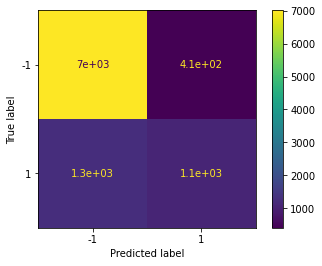

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_2 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_2)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.8224997440884431


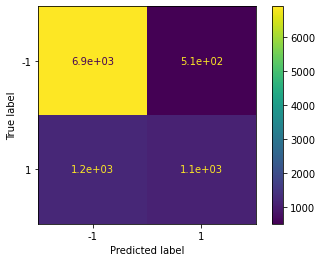

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.8247517657897431


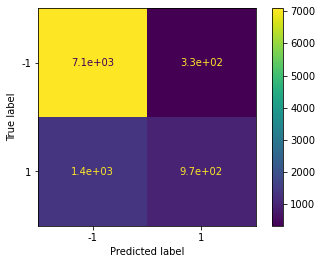

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.763332992117924


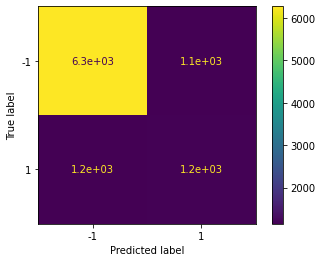

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM sin Genero B. 

In [ ]:
DataB = DataB.drop(['Genero B.'], axis=1)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,H.Laborales,Pais de Origen
0,39,6,13,3,9,4,1,40,1
1,50,2,13,1,5,3,1,13,1
2,38,1,9,2,7,4,1,40,1
3,53,1,7,1,7,3,4,40,1
4,28,1,13,1,6,1,4,40,13
...,...,...,...,...,...,...,...,...,...
32556,27,1,12,1,1,1,1,38,1
32557,40,1,9,1,8,3,1,40,1
32558,58,1,9,5,9,6,1,40,1
32559,22,1,9,3,9,2,1,20,1


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.8287439860784113


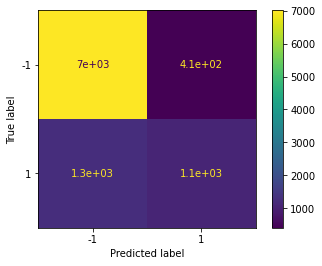

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_3 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_3)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.8236257549390931


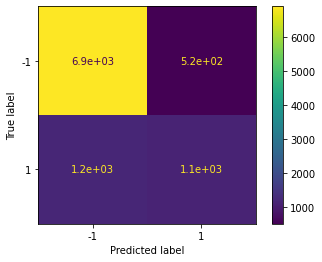

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.8233186610707339


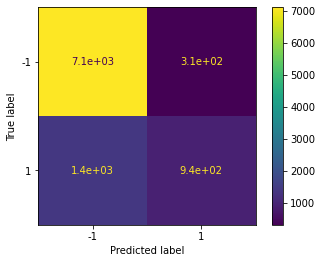

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7561674685228785


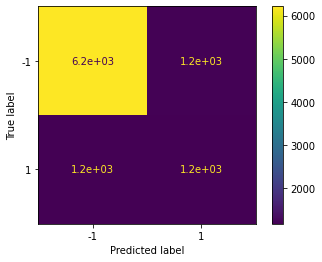

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM sin Pais de O. ni Genero B.

In [ ]:
DataB = DataB.drop(['Pais de Origen'], axis=1)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,H.Laborales
0,39,6,13,3,9,4,1,40
1,50,2,13,1,5,3,1,13
2,38,1,9,2,7,4,1,40
3,53,1,7,1,7,3,4,40
4,28,1,13,1,6,1,4,40
...,...,...,...,...,...,...,...,...
32556,27,1,12,1,1,1,1,38
32557,40,1,9,1,8,3,1,40
32558,58,1,9,5,9,6,1,40
32559,22,1,9,3,9,2,1,20


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.8307912785341386


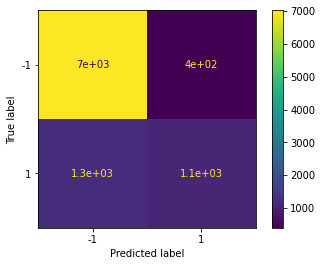

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_4 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_4)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### Comparación y Analisis

Text(0.5, 1.0, 'Comparativa del % de Precisión sobre el 82.8%')

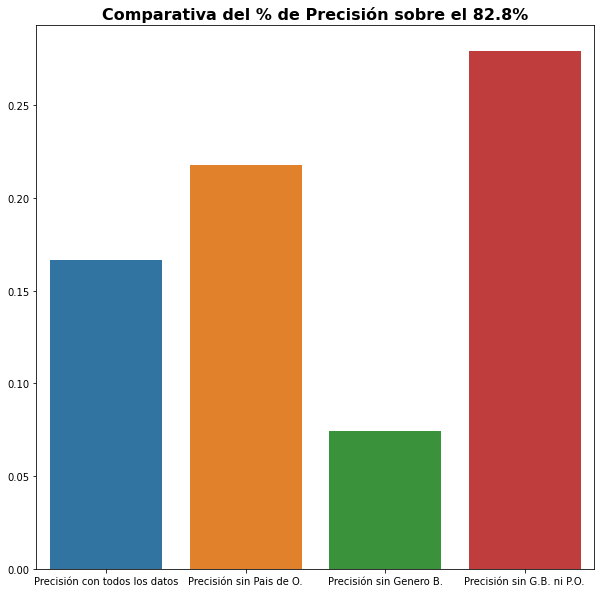

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
accuracy_1 = Acc_1*100-82.8
accuracy_2 = Acc_2*100-82.8
accuracy_3 = Acc_3*100-82.8
accuracy_4 = Acc_4*100-82.8
sns.barplot(x=[ "Precisión con todos los datos", "Precisión sin Pais de O.", "Precisión sin Genero B.", "Precisión sin G.B. ni P.O."],
            y=[ accuracy_2, accuracy_1, accuracy_3, accuracy_4])
ax.set_title('Comparativa del % de Precisión sobre el 82.8%',
             fontsize=16, weight="bold")

#En todos los casos se tomaron los resultados con Kernel RBF pues fue el mejor resultado en cada caso

## Support Vector Machines (Sin sesgo)

### Reduccion de sesgo

In [ ]:
#Inicializar la base de datos original
DataF = pd.read_csv("drive/MyDrive/SVM/Adultos Data Set/adult.csv")

def CapitalIndicator(Capital):
  if ("<" in Capital):
    return (-1)
  if (">" in Capital):
    return (1)

#Podemos definir funciones y crear nuevas columnas con datos generados a partir de los datos ya existentes
DataF["Capital"] = DataF["Capital"].apply(CapitalIndicator)
DataF

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,-1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,-1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,-1


A continuacion mostraremos el conteo de datos en ambas clases del conjunto de datos ($<50$ y $>50$) para denotar que la base esta sesgada a los datos de $<50$ , analogo al caso descrito en el articulo [Credit Fraud Detector](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets), haremos un pequeño tratamiento de los datos con el objetivo de comparar los resultados entre las SVM concervando el sesgo y despues de eliminarlo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


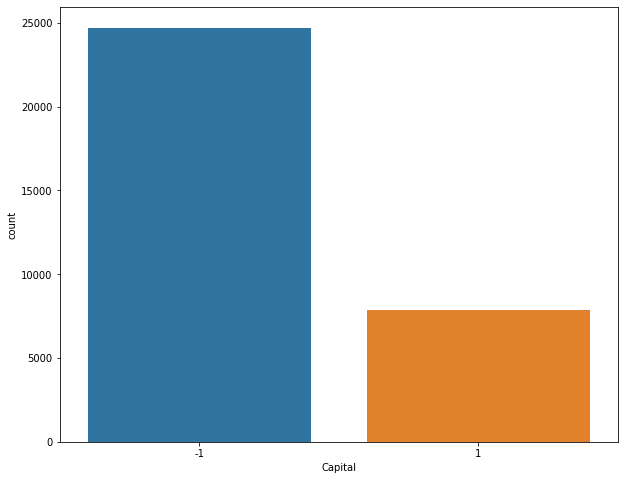

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot('Capital', data=DataF)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


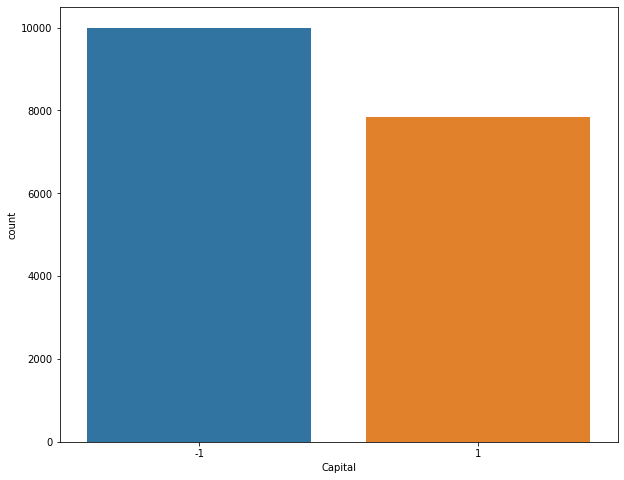

In [ ]:
Data_Frame0 = DataF.loc[DataF['Capital'] == -1][:10000]
Data_Frame1 = DataF.loc[DataF['Capital'] == 1][:10000]

DataF = pd.concat([Data_Frame0,Data_Frame1])

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot('Capital', data=DataF)

plt.show()

In [ ]:
DataB = pd.DataFrame()

DataB["Edad"] = DataF["Age"]
DataB["T. Trabajo"] = DataF["Workclass"].apply(ClassToType) 
DataB["Nivel Educativo"] = DataF["Education-num"]
DataB["E. Civil"] = DataF["Marital-Status"].apply(StatusToType) 
DataB["Ocupación"] = DataF["Occupation"].apply(OcupToType)
DataB["T. Pareja"] = DataF["Relationship"].apply(RelationToType)
DataB["Raza"] = DataF["Race"].apply(RaceToType)
DataB["Genero B."] = DataF["Sex"].apply(SexToType)
DataB["H.Laborales"] = DataF["Hours-per-Week"]

df = DataB

"""
####    Noemalizar no cambio nada   ####

def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

DataB = minmax_norm(df)
"""

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales
0,39,6,13,3,9,4,1,2,40
1,50,2,13,1,5,3,1,2,13
2,38,1,9,2,7,4,1,2,40
3,53,1,7,1,7,3,4,2,40
4,28,1,13,1,6,1,4,1,40
...,...,...,...,...,...,...,...,...,...
32539,71,0,16,1,0,3,1,2,10
32545,39,5,12,1,9,1,1,1,20
32554,53,1,14,1,5,3,1,2,40
32557,40,1,9,1,8,3,1,2,40


### SVM sin Pais de origen

In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

#De todas maneras hice la prueba con otras proporciones pero no mejoraron el resultado

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)


#?????????????????????????????????????????????????????????????????????????????????????????????????????
sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.7967494862693817


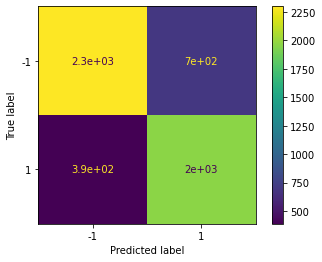

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_1 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_1)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.7847935736969923


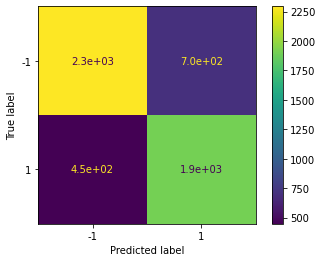

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7776947506071362


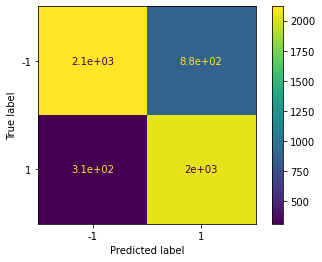

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7009153745563236


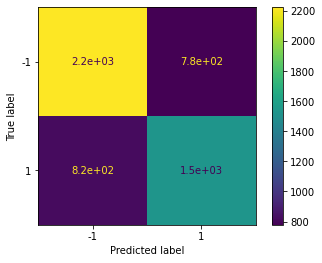

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM Completo


#### Funcion de Pais de Origen (Indicador Numerico)

In [ ]:
#Native-Country (Descriptivo) --> Pais de Origen (Indicador Numerico)
def NatToType (X):
  if ("United-States" in X):
    return (1)
  if ("Cambodia" in X):
    return (2)
  if ("England" in X):
    return (3)
  if ("Puerto-Rico" in X):
    return (4)
  if ("Canada" in X):
    return (5)
  if ("Germany" in X):
    return (6)
  if ("Outlying-US" in X):
    return (7)
  if ("India" in X):
    return (8)
  if ("Japan" in X):
    return (9)
  if ("Greece" in X):
    return (10)
  if ("South" in X):
    return (11)
  if ("China" in X):
    return (12)
  if ("Cuba" in X):
    return (13)
  if ("Iran" in X):
    return (14)  
  if ("Honduras" in X):
    return (15)
  if ("Philippines" in X):
    return (16)
  if ("Italy" in X):
    return (17)
  if ("Poland" in X):
    return (18)
  if ("Jamaica" in X):
    return (19)
  if ("Vietnam" in X):
    return (20)
  if ("Mexico" in X):
    return (21)
  if ("Portugal" in X):
    return (22)
  if ("Ireland" in X):
    return (23)
  if ("France" in X):
    return (24)
  if ("Dominican-Republic" in X):
    return (25)
  if ("Laos" in X):
    return (26)
  if ("Ecuador" in X):
    return (27)
  if ("Taiwan" in X):
    return (28)
  if ("Haiti" in X):
    return (29)
  if ("Columbia" in X):
    return (30)
  if ("Hungary" in X):
    return (31)
  if ("Guatemala" in X):
    return (32)
  if ("Nicaragua" in X):
    return (33)
  if ("Scotland" in X):
    return (34)
  if ("Thailand" in X):
    return (35)
  if ("Yugoslavia" in X):
    return (36)
  if ("El-Salvador" in X):
    return (37)
  if ("Trinadad&Tobago" in X):
    return (38)
  if ("Peru" in X):
    return (39)
  if ("Hong" in X):
    return (40)
  if ("Holand-Netherlands" in X):
    return (41)
  else:
    return (0)

#### Ejecución 

In [ ]:
DataB["Pais de Origen"] = DataF["Native-Country"].apply(NatToType)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales,Pais de Origen
0,39,6,13,3,9,4,1,2,40,1
1,50,2,13,1,5,3,1,2,13,1
2,38,1,9,2,7,4,1,2,40,1
3,53,1,7,1,7,3,4,2,40,1
4,28,1,13,1,6,1,4,1,40,13
...,...,...,...,...,...,...,...,...,...,...
32539,71,0,16,1,0,3,1,2,10,1
32545,39,5,12,1,9,1,1,1,20,1
32554,53,1,14,1,5,3,1,2,40,1
32557,40,1,9,1,8,3,1,2,40,1


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.7950681860638894


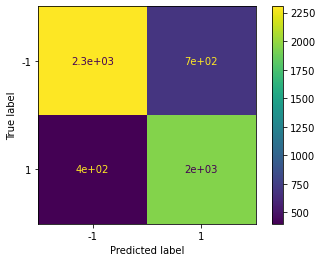

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_2 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_2)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.7861012516345974


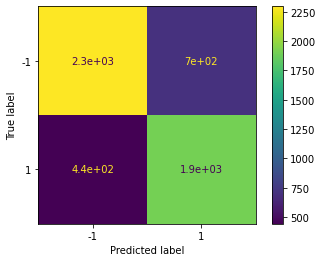

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7790024285447412


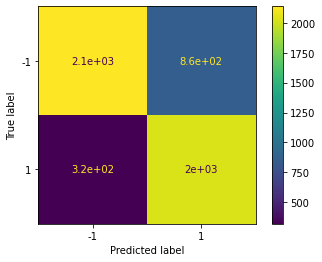

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7152998318699795


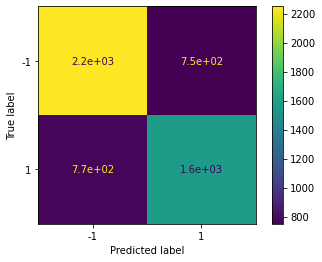

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM sin Genero B. 

In [ ]:
DataB = DataB.drop(['Genero B.'], axis=1)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,H.Laborales,Pais de Origen
0,39,6,13,3,9,4,1,40,1
1,50,2,13,1,5,3,1,13,1
2,38,1,9,2,7,4,1,40,1
3,53,1,7,1,7,3,4,40,1
4,28,1,13,1,6,1,4,40,13
...,...,...,...,...,...,...,...,...,...
32539,71,0,16,1,0,3,1,10,1
32545,39,5,12,1,9,1,1,20,1
32554,53,1,14,1,5,3,1,40,1
32557,40,1,9,1,8,3,1,40,1


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.7969362974033253


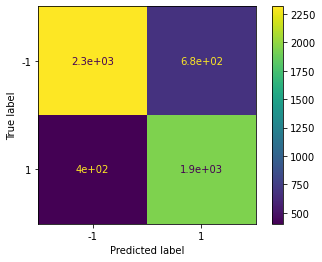

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_3 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_3)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

####Pruebas con otros kernels (No mejoran el resultado)

0.7853540070988231


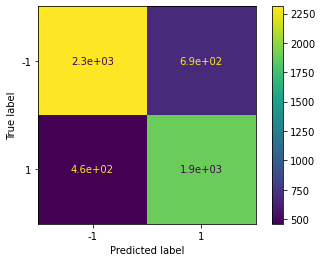

In [ ]:
#Modelo con Kernel Linear
SegmentacionSalarial = svm.SVC(kernel='linear')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7831122734915001


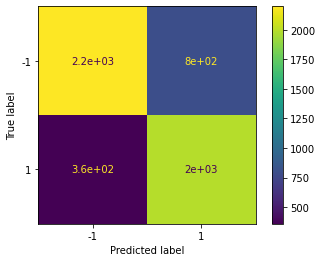

In [ ]:
#Modelo con Kernel Polinomial
SegmentacionSalarial = svm.SVC(kernel='poly')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

0.7147393984681487


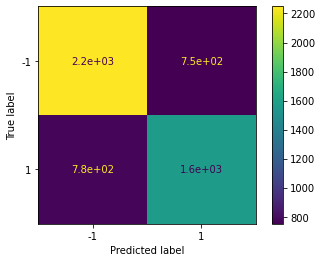

In [ ]:
#Modelo con Kernel Sigmoideal
SegmentacionSalarial = svm.SVC(kernel='sigmoid')
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
print(SegmentacionSalarial.score(X_test,y_test))
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### SVM sin Pais de O. ni Genero B.

In [ ]:
DataB = DataB.drop(['Pais de Origen'], axis=1)

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,H.Laborales
0,39,6,13,3,9,4,1,40
1,50,2,13,1,5,3,1,13
2,38,1,9,2,7,4,1,40
3,53,1,7,1,7,3,4,40
4,28,1,13,1,6,1,4,40
...,...,...,...,...,...,...,...,...
32539,71,0,16,1,0,3,1,10
32545,39,5,12,1,9,1,1,20
32554,53,1,14,1,5,3,1,40
32557,40,1,9,1,8,3,1,40


In [ ]:
#Preparo los datos para el entrenamiento decidi usar el 70% de los datos para esto
# por el documento de analisis de Algoritmos, dejando el 30% para el testeo

y = DataF["Capital"]
X= DataB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

0.7973099196712125


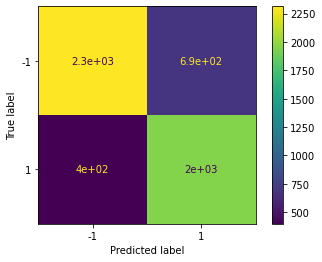

In [ ]:
#Modelo con Kernel RBF
SegmentacionSalarial = svm.SVC()
SegmentacionSalarial.fit(X_train, y_train)

Y = SegmentacionSalarial.predict(X_test)
Acc_4 = SegmentacionSalarial.score(X_test,y_test)
print(Acc_4)
confusion_matrix(Y, y_test)

plot_confusion_matrix(SegmentacionSalarial, X_test, y_test)  
plt.show()

### Comparación y Analisis

Text(0.5, 1.0, 'Comparativa del % de Presición sobre el 79%')

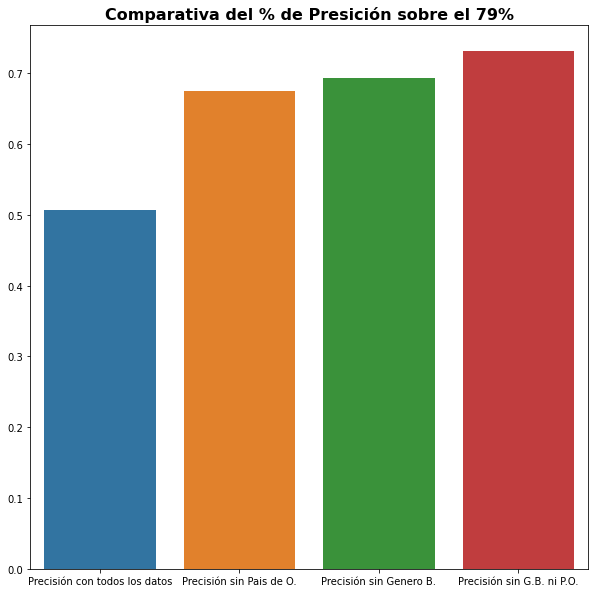

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
accuracy_1 = Acc_1*100-79
accuracy_2 = Acc_2*100-79
accuracy_3 = Acc_3*100-79
accuracy_4 = Acc_4*100-79
sns.barplot(x=[ "Precisión con todos los datos", "Precisión sin Pais de O.", "Precisión sin Genero B.", "Precisión sin G.B. ni P.O."],
            y=[ accuracy_2, accuracy_1, accuracy_3, accuracy_4])
ax.set_title('Comparativa del % de Presición sobre el 79%',
             fontsize=16, weight="bold")

#En todos los casos se tomaron los resultados con Kernel RBF pues fue el mejor resultado en cada caso

##Corelación

In [ ]:
#Inicializar la base de datos original
DataF = pd.read_csv("drive/MyDrive/SVM/Adultos Data Set/adult.csv")

def CapitalIndicator(Capital):
  if ("<" in Capital):
    return (-1)
  if (">" in Capital):
    return (1)

#Podemos definir funciones y crear nuevas columnas con datos generados a partir de los datos ya existentes
DataF["Capital"] = DataF["Capital"].apply(CapitalIndicator)
DataF

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,-1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,-1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,-1


In [ ]:
DataB = pd.DataFrame()

DataB["Edad"] = DataF["Age"]
DataB["T. Trabajo"] = DataF["Workclass"].apply(ClassToType) 
DataB["Nivel Educativo"] = DataF["Education-num"]
DataB["E. Civil"] = DataF["Marital-Status"].apply(StatusToType) 
DataB["Ocupación"] = DataF["Occupation"].apply(OcupToType)
DataB["T. Pareja"] = DataF["Relationship"].apply(RelationToType)
DataB["Raza"] = DataF["Race"].apply(RaceToType)
DataB["Genero B."] = DataF["Sex"].apply(SexToType)
DataB["H.Laborales"] = DataF["Hours-per-Week"]

DataB

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales
0,39,6,13,3,9,4,1,2,40
1,50,2,13,1,5,3,1,2,13
2,38,1,9,2,7,4,1,2,40
3,53,1,7,1,7,3,4,2,40
4,28,1,13,1,6,1,4,1,40
...,...,...,...,...,...,...,...,...,...
32556,27,1,12,1,1,1,1,1,38
32557,40,1,9,1,8,3,1,2,40
32558,58,1,9,5,9,6,1,1,40
32559,22,1,9,3,9,2,1,2,20


In [ ]:
"""Para garantizar la utilidad de todos los datos
se busca que no exista correlacion entre ellos, ya 
que esto implicaria que dos tipos de datos distintos
estan dando la misma informacion y ensuciarian el resultado, 
apoyados en la libreria de pandas, usamos el comando .crr()
para ver qu ¿e esta correlacion no existe entre nuestros
datos, lo cual es bueno para el estudio y su analisis"""

#Nota:
#     [ 0.7 , 1 ] Correlacion Fuerte
#     [0.3 , 0.7) Correlacion Leve
#     (-0.3, 0.3) Sin Correlacion ---Esto es lo Ideal---
#     (-0.7,-0.3] Correlacion inversa Leve  (Cuando uno crece el otro decrece)
#     [-1 , -0.7] Correlacion Inversa Fuerte 
 
Cor = DataB
Cor["Capital"] = DataF["Capital"]
Cor.corr()

,Edad,T. Trabajo,Nivel Educativo,E. Civil,Ocupación,T. Pareja,Raza,Genero B.,H.Laborales,Capital
Edad,1.000000,0.109775,0.036527,-0.220938,0.000992,0.128919,-0.034875,0.088832,0.068756,0.234037
T. Trabajo,0.109775,1.000000,0.186363,-0.072782,0.222034,0.022639,0.021704,0.012402,0.069729,0.102722
Nivel Educativo,0.036527,0.186363,1.000000,-0.107648,0.000234,-0.031898,-0.080271,0.012280,0.148123,0.335154
E. Civil,-0.220938,-0.072782,-0.107648,1.000000,-0.018304,0.362819,0.129520,-0.380043,-0.221882,-0.377794
Ocupación,0.000992,0.222034,0.000234,-0.018304,1.000000,0.028365,0.026619,-0.011341,0.104417,-0.007742
T. Pareja,0.128919,0.022639,-0.031898,0.362819,0.028365,1.000000,0.117390,-0.169737,0.056941,-0.171771
Raza,-0.034875,0.021704,-0.080271,0.129520,0.026619,0.117390,1.000000,-0.113599,-0.052912,-0.097578
Genero B.,0.088832,0.012402,0.012280,-0.380043,-0.011341,-0.169737,-0.113599,1.000000,0.229309,0.215980
H.Laborales,0.068756,0.069729,0.148123,-0.221882,0.104417,0.056941,-0.052912,0.229309,1.000000,0.229689
Capital,0.234037,0.102722,0.335154,-0.377794,-0.007742,-0.171771,-0.097578,0.215980,0.229689,1.000000
